<a href="https://colab.research.google.com/github/MarasaniJhansi/Alzheimer-s-Disease-Classification-using-InceptionV3/blob/main/ResNet50New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Datasets/Non_Demented/non_demented_1585.jpg  
  inflating: Datasets/Non_Demented/non_demented_1586.jpg  
  inflating: Datasets/Non_Demented/non_demented_1587.jpg  
  inflating: Datasets/Non_Demented/non_demented_1588.jpg  
  inflating: Datasets/Non_Demented/non_demented_1589.jpg  
  inflating: Datasets/Non_Demented/non_demented_159.jpg  
  inflating: Datasets/Non_Demented/non_demented_1590.jpg  
  inflating: Datasets/Non_Demented/non_demented_1591.jpg  
  inflating: Datasets/Non_Demented/non_demented_1592.jpg  
  inflating: Datasets/Non_Demented/non_demented_1593.jpg  
  inflating: Datasets/Non_Demented/non_demented_1594.jpg  
  inflating: Datasets/Non_Demented/non_demented_1595.jpg  
  inflating: Datasets/Non_Demented/non_demented_1596.jpg  
  inflating: Datasets/Non_Demented/non_demented_1597.jpg  
  inflating: Datasets/Non_Demented/non_demented_1598.jpg  
  inflating: Datasets/Non_Demented/non_demented_1599.jpg  
  infl

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

# Provide the input folder containing your data and the output folder where you want to save the split data
input_folder = '/content/Datasets/'
output_folder = '/content/datasets/'

# Specify the ratio for splitting (in this case, 80% for training and 20% for testing)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2), group_prefix=None)


Copying files: 10699 files [00:01, 6470.03 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Constants and parameters
SEED = 1
BATCH_SIZE = 32
IMG_SIZE = (128, 128)
INPUT_SHAPE = IMG_SIZE + (3,)
train_data_dir = '/content/datasets/train'  # Replace this with the path to your 'Dataset' folder
test_data_dir = '/content/datasets/val'
epochs = 20

# Load and preprocess the data
X_train = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Load the ResNet50 base model (pre-trained on ImageNet)
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Freeze the layers in the base model
base_model.trainable = False

# Add additional layers for classification
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(4, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Train the model
history = model.fit(
    X_train,
    validation_data=X_validation,
    epochs=epochs,
    callbacks=[early_stopping]
)



Found 8559 files belonging to 4 classes.
Found 2140 files belonging to 4 classes.
Epoch 1/20
268/268 [==============================] - 17s 50ms/step - loss: 1.7861 - accuracy: 0.5900 - val_loss: 0.8342 - val_accuracy: 0.6364
Epoch 2/20
268/268 [==============================] - 12s 46ms/step - loss: 0.5810 - accuracy: 0.7480 - val_loss: 0.6144 - val_accuracy: 0.7285
Epoch 3/20
268/268 [==============================] - 12s 45ms/step - loss: 0.4630 - accuracy: 0.8035 - val_loss: 0.6127 - val_accuracy: 0.7393
Epoch 4/20
268/268 [==============================] - 12s 45ms/step - loss: 0.3853 - accuracy: 0.8453 - val_loss: 0.5554 - val_accuracy: 0.7696
Epoch 5/20
268/268 [==============================] - 12s 45ms/step - loss: 0.2804 - accuracy: 0.8918 - val_loss: 0.5705 - val_accuracy: 0.7692
Epoch 6/20
268/268 [==============================] - 12s 45ms/step - loss: 0.2604 - accuracy: 0.8981 - val_loss: 0.5344 - val_accuracy: 0.7813
Epoch 7/20
268/268 [==============================] - 

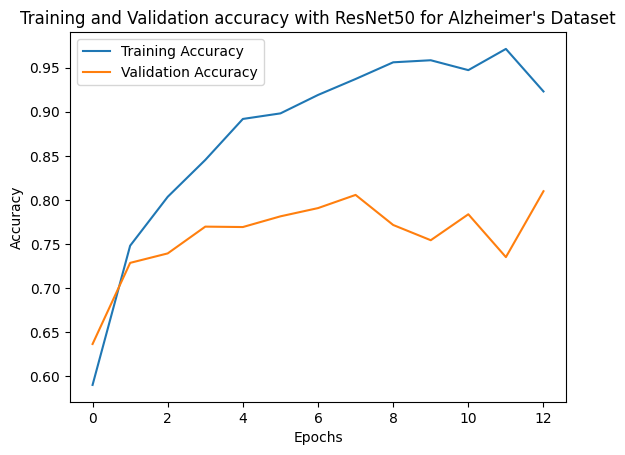

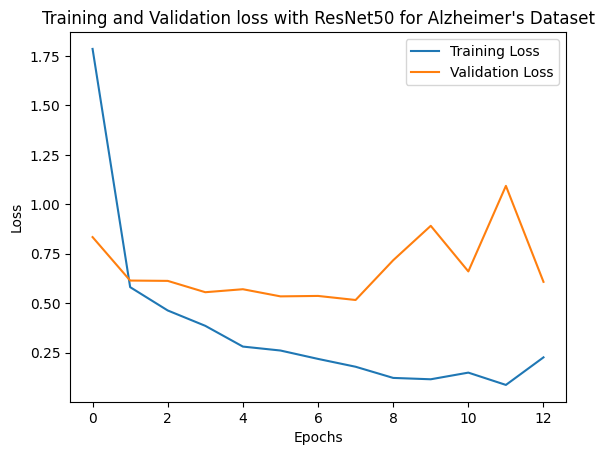

67/67 [==============================] - 3s 36ms/step
Confusion Matrix:
[[404   2  16  78]
 [  2 501   3   4]
 [ 34   5 358 133]
 [ 58   5  67 470]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       500
           1       0.98      0.98      0.98       510
           2       0.81      0.68      0.74       530
           3       0.69      0.78      0.73       600

    accuracy                           0.81      2140
   macro avg       0.82      0.81      0.81      2140
weighted avg       0.81      0.81      0.81      2140

1/1 [==============================] - 2s 2s/step
Predicted Class: 0


In [ ]:

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation accuracy with ResNet50 for Alzheimer's Dataset")
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and Validation loss with ResNet50 for Alzheimer's Dataset")
plt.legend()
plt.show()

# Perform predictions on validation set
y_validation = []
for images, labels in X_validation:
    y_validation.extend(labels.numpy())
y_validation = np.array(y_validation)

y_pred = model.predict(X_validation)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y_validation, y_pred_classes)
print("Classification Report:")
print(class_report)

# Making predictions on an image from the dataset
for images, labels in X_validation.take(1):
    image_to_predict = images[0]  # Change the index accordingly

# Reshape the image according to model input shape and make prediction
prediction = model.predict(np.expand_dims(image_to_predict, axis=0))
predicted_class = np.argmax(prediction)

# Display the predicted class
print(f"Predicted Class: {predicted_class}")